In [1]:
%load_ext autoreload
%autoreload 2

## Módulos y configuración

In [2]:
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append("../") # El módulo está en el directorio superior
import schemes.SIR_react_diffusion_1d as SIR_scheme
from schemes.SIR_react_diffusion_1d import test_name, run_test
#plt.style.use('seaborn-pastel')
plt.style.use('seaborn-dark')
plt.rcParams["figure.dpi"] = 100

## Ejecutar el test numérico

In [8]:
from copy import copy

parameters = copy(SIR_scheme.default_parameters)
parameters["nx"] = 50
parameters["dt"] = 5.e-3
parameters["n_iter"] = 60
parameters["beta"] = 1.e-3 # Infection rate
parameters["mu"] = 0 # Nacimientos

def test_1 (parameters):
    import time
 
    print ( f'{test_name}:' )
    print ( '  FENICS/Python version' )
    print ( '  Implicit solver.' )
    print ( ' ', time.ctime ( time.time() ) )

    plot_each_iteration = False
    
    S = [] # S[i] = distribution of susceptibles at time setp i
    I = [] # I[i] = distribution of infected at time setp i
    R = [] # R[i] = distribution of recovered at time setp i
    
    iter = 0
    for S_i, I_i, R_i in run_test ( parameters, plot_options={ "save": False } ):

        S.append(S_i[:]); I.append(I_i[:]); R.append(R_i[:])

        if plot_each_iteration:
            plt.plot(S, lw=2, label="(S)usceptibles")
            plt.plot(I, lw=2, label="(I)nfectados")
            plt.plot(R, lw=2, label="(R)ecovered")

            plt.legend()
            plt.grid()
            plt.show()

    print ( '' )
    print ( f"{test_name}:" )
    print ( '  Normal end of execution.' )
    print ( '' )
    print ( time.ctime ( time.time() ) )
    return S, I, R

S, I, R = test_1(parameters)

SIR_react_difuss:
  FENICS/Python version
  Implicit solver.
  Sun Apr 12 22:38:07 2020
  plotting {'save': False}, SIR_react_difuss_mesh.png
Total number of individuals: 83124.99999999997
  plotting {'save': False}, SIR_react_difuss_S0.png
  plotting {'save': False}, SIR_react_difuss_I0.png
Time setep 1 (t=0.005)
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time setep 2 (t=0.01)
  plotting {'save': False}, SIR_react_difuss_S1_2.png
  plotting {'save': False}, SIR_react_difuss_I1_2.png
  plotting {'save': False}, SIR_react_difuss_R1_2.png
Time setep 3 (t=0.015)
Time setep 4 (t=0.02)
  plotting {'save': False}, SIR_react_difuss_S1_4.png
  plotting {'save': False}, SIR_react_difuss_I1_4.png
  plotting {'save': False}, SIR_react_difuss_R1_4.png
Time setep 5 (t=0.025)
Time setep 6 (t=0.03)
  plotting {'save': False}, SIR_react_difuss_S1_6.png
  plotting {'save': False}, SIR_react_difuss_I1_6.png
  plotting {'save': False}, SIR_react_difuss_R1_6.png
Time setep 7 (t=0.03

In [4]:
def plot_summary_over_time(individuals, parameters, verbosity=0):
    S, I, R = individuals
    
    # 1. Sum mumber of individuals at each time iteration
    
    S_sum = [] # Total number of susceptible at each time step
    I_sum = [] # Total number of infected at each time step
    R_sum = [] # Total number of infected at each time step
    for i in range(len(S)):
        S_sum.append(np.sum(S[i]))
        I_sum.append(np.sum(I[i]))
        R_sum.append(np.sum(R[i]))
        if verbosity:
            print(f"Total Susceptibles: {S_sum[-1]}")
            print(f"Total Infectados  : {I_sum[-1]}")
            print(f"Total Recuperados : {R_sum[-1]}")
            
    # 2. Plot S, I over time
        
    dt=parameters["dt"]
    nt=parameters["n_iter"]
    t_grid = np.linspace(0, nt*dt, nt+1)
    plt.title("Evolution over time of S, I")
    plt.plot(t_grid, S_sum, "-.", lw=2, label="(S)usceptible")
    plt.plot(t_grid, I_sum,  "-", lw=3, label="(I)nfected")
    plt.plot(t_grid, R_sum, "--", lw=2, label="(R)ecovered")
    plt.xlabel("Time")
    plt.ylabel("Individuals")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    plt.grid()
    plt.legend()
    plt.show()
    

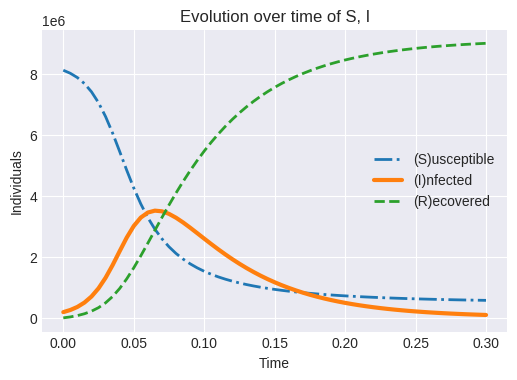

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([123.38294808, -25.90604406,  27.0252904 ,  23.90698211,
         36.02641752,  44.38835329,  54.08795641,  63.76025637,
         73.77100996,  84.02221365,  94.54012745, 105.317715  ,
        116.3568617 , 127.65706236, 139.21845233, 151.04099535,
        163.12470114, 175.4695671 , 188.07559392, 200.94278141,
        214.07112962, 227.46063855, 241.1113082 , 255.02313855,
        269.19612962, 283.63028141, 298.32559391, 313.28206712,
        328.49970105, 343.9784957 , 359.71845105, 375.71956713,
        391.9818439 , 408.50528143

In [5]:
plot_summary_over_time([S, I, R], parameters)
R

## Crear un vídeo con los resultados

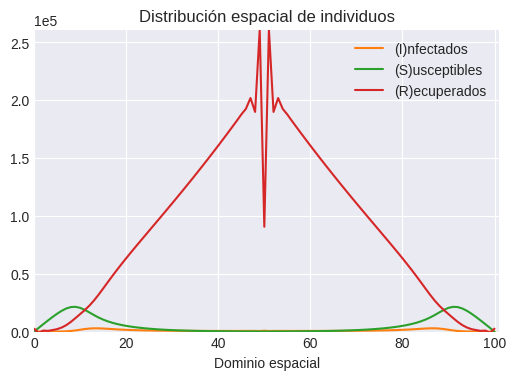

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image

from matplotlib import animation
from IPython.display import HTML

Nx = len(S[0])
Nt = len(S)
x = np.arange(Nx)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
maxS = max( [np.max(S[i]) for i in range(Nt)] )
maxI = max( [np.max(I[i]) for i in range(Nt)] )
maxR = max( [np.max(R[i]) for i in range(Nt)] )
ax = plt.axes(xlim=(0, Nx), ylim=(-1, max(maxS, maxI, maxR)))
ax.grid()
ax.set_xlabel("Dominio espacial")
ax.set_title("Distribución espacial de individuos")
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

line, = ax.plot([], [], lw=1) 

lines = []
for index in range(3): # S, I, R
    lobj = ax.plot([],[])[0]
    lines.append(lobj)
    
# Initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([],[])
    return lines


# Animation function which updates figure data.  This is called sequentially
def animate(i):
    y_list = [ I[i], S[i], R[i] ]
    label_list = ["(I)nfectados", "(S)usceptibles", "(R)ecuperados"]
    for lnum, line in enumerate(lines):
        line.set_data(x, y_list[lnum]) # set data for each line separately. 
        line.set_label(label_list[lnum])
    ax.legend()
    return lines

# Call the animator.  blit=True means only rehttp://localhost:8888/notebooks/src/modelos_epidemia/modelos-difusion/Untitled2.ipynb#-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=300, blit=True)

#plt.close(anim._fig)

# Call function to display the animation
HTML(anim.to_html5_video())
